In [23]:
library(tseries)
library(forecast)
library(ggplot2)
library(zoo)

# Arrivals

In [33]:
df <- read.csv("../data/sample/333_arrivals.csv", header = FALSE)
df$V1 <- as.Date(df$V1, "%Y-%m-%d")
colnames(df) <- c("Date", "Count")
head(df, 10)

Date,Count
2013-09-27,2
2013-09-28,21
2013-09-29,13
2013-09-30,5
2013-10-01,7
2013-10-02,19
2013-10-03,7
2013-10-04,9
2013-10-05,13
2013-10-06,5


In [76]:
temp.zoo<-zoo(df$Count,df$Date)
m.av<-rollmean(temp.zoo, 10,fill = list(NA, NULL, NA))
m.sd <- rollapply(df$Count, width = 10, FUN = sd, na.pad = TRUE)
df$cmb=coredata(m.av)
df$csd=coredata(m.sd)
head(df)

Warning message in rollapply.zoo(zoo(data), ...):
“na.pad argument is deprecated”

Date,Count,cmb,csd
2013-09-27,2,NA,NA
2013-09-28,21,NA,NA
2013-09-29,13,NA,NA
2013-09-30,5,NA,NA
2013-10-01,7,10.1,6.261878
2013-10-02,19,10.7,5.657836


## Raw Plot

Warning message:
“Removed 9 rows containing missing values (geom_path).”Warning message:
“Removed 9 rows containing missing values (geom_path).”

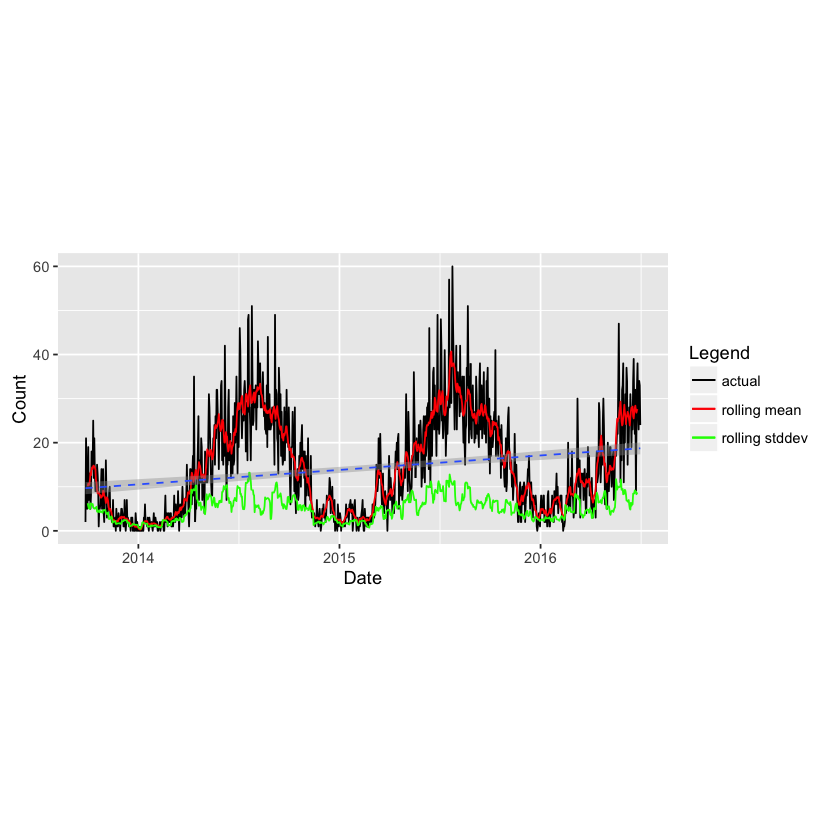

In [85]:
ggplot(df, aes(Date, Count)) + 
geom_line(aes(y=Count,colour="actual")) + 
geom_line(aes(y=cmb,colour="rolling mean")) + 
geom_line(aes(y=csd,colour="rolling stddev")) + 
geom_smooth(method='lm',formula=y~x,  linetype="dashed", size = 0.5) +
scale_colour_manual("Legend", values=c("actual"="black", "rolling mean"="red","rolling stddev"="green")) + 
coord_fixed(ratio = 8)

## TS Plot

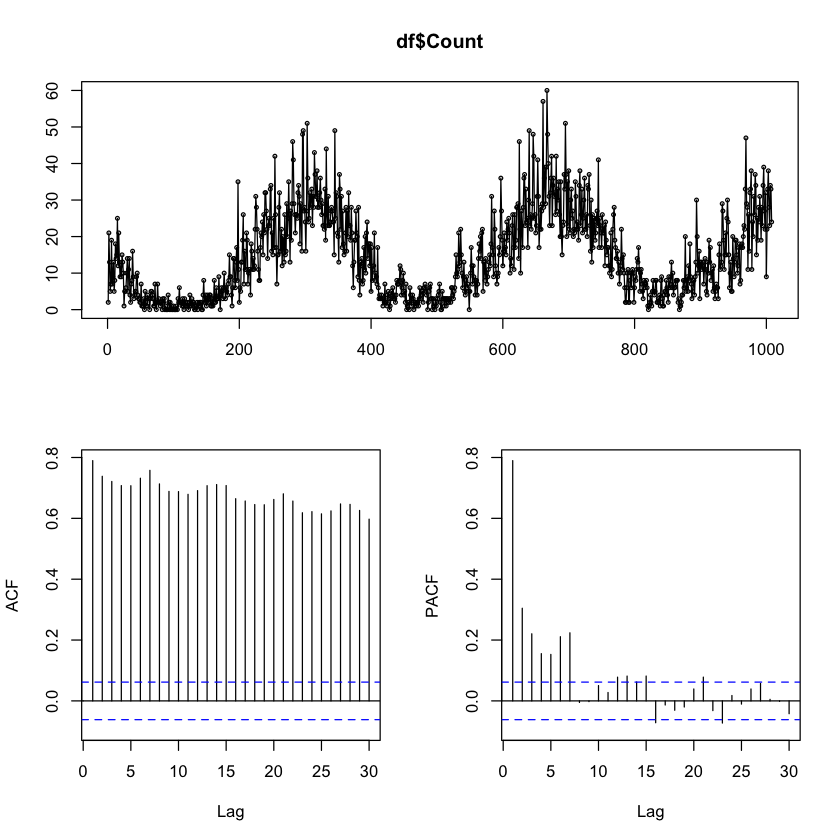

In [14]:
tsdisplay(df$Count)

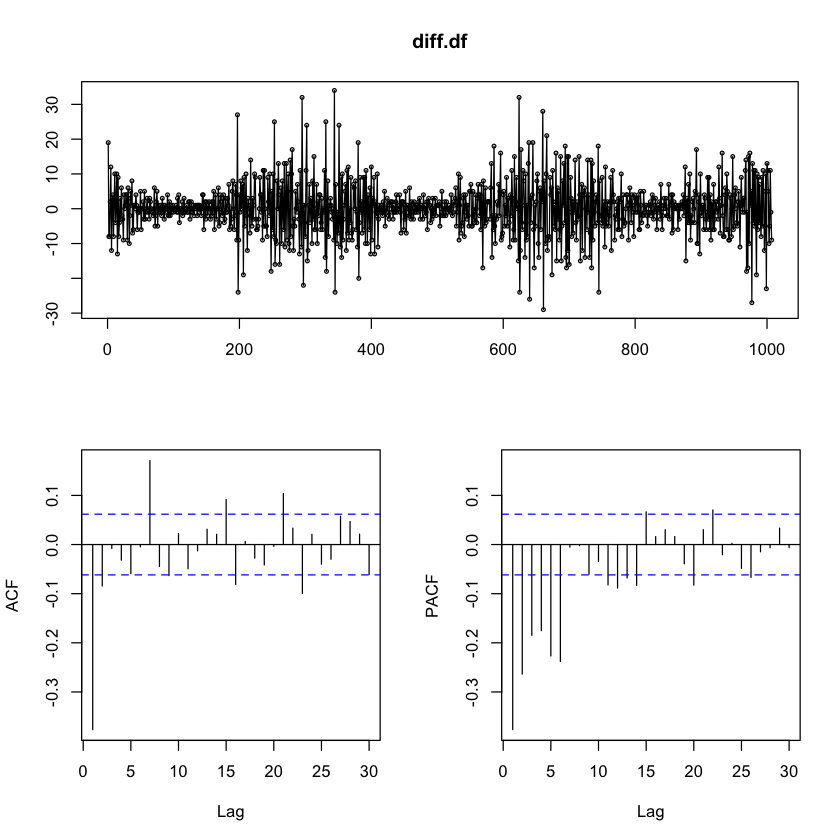

In [64]:
diff.df <- diff(df$Count)
tsdisplay(diff.df)

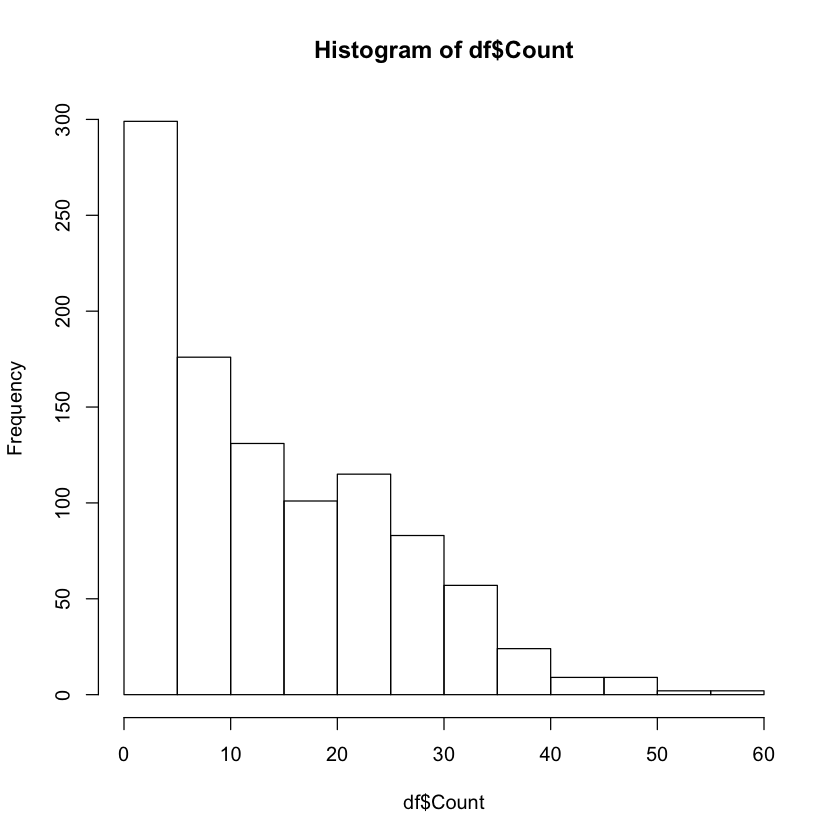

In [21]:
hist(df$Count)

## Power Spectral Density

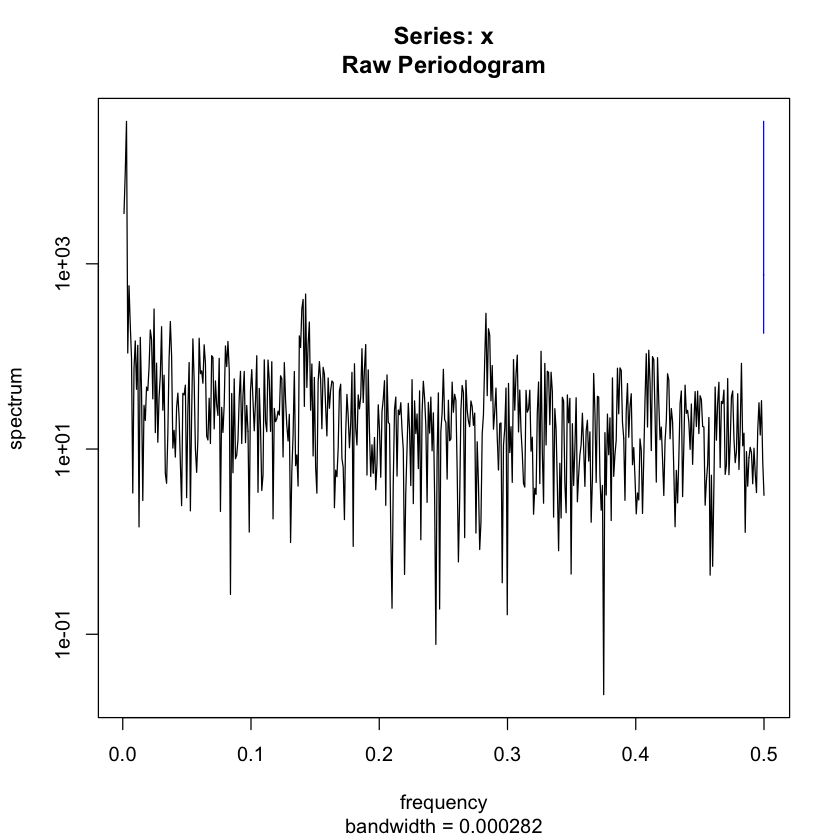

In [87]:
spectrum(df$Count)

# Departures

In [16]:
df <- read.csv("../data/sample/333_departures.csv", header = FALSE)
df$V1 <- as.Date(df$V1, "%Y-%m-%d")
head(df)

V1,V2
2013-09-27,3
2013-09-28,18
2013-09-29,6
2013-09-30,6
2013-10-01,9
2013-10-02,18


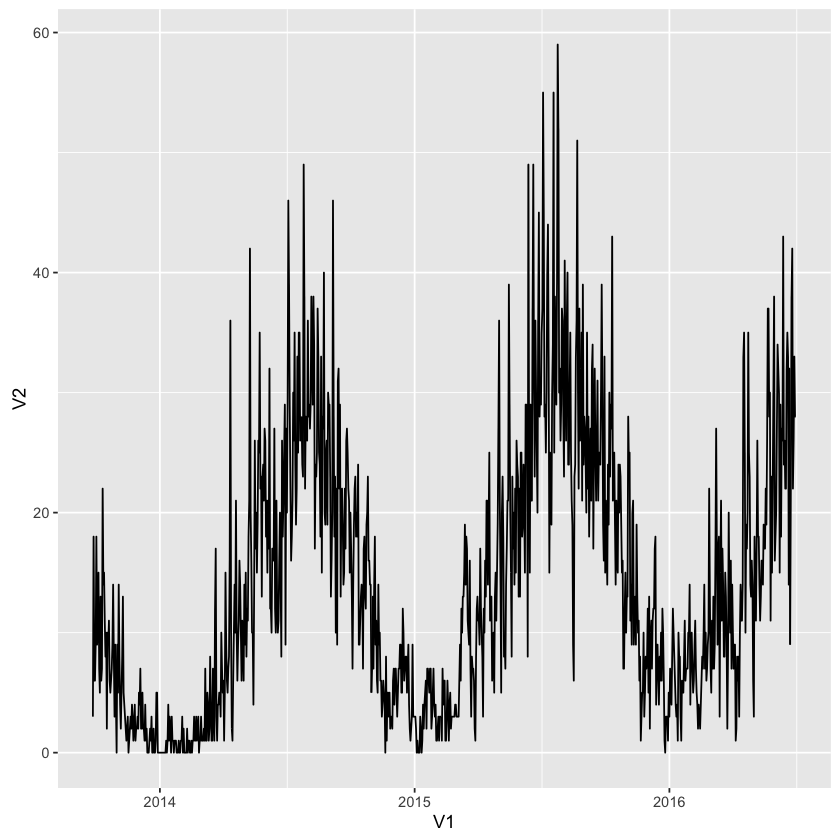

In [17]:
ggplot( data = df, aes( V1, V2 )) + geom_line() 

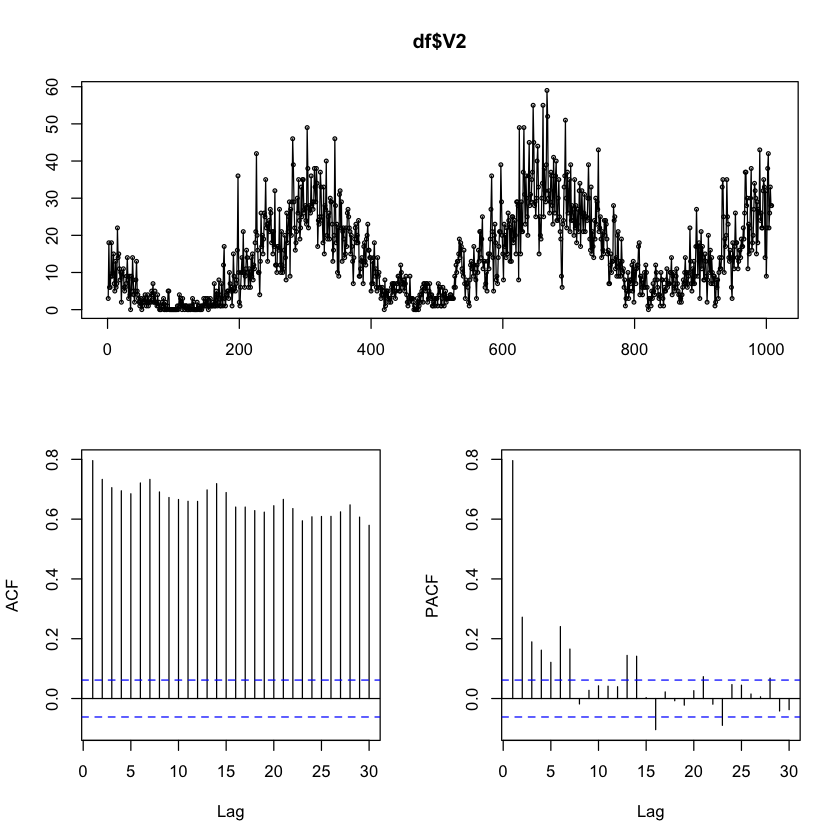

In [18]:
tsdisplay(df$V2)

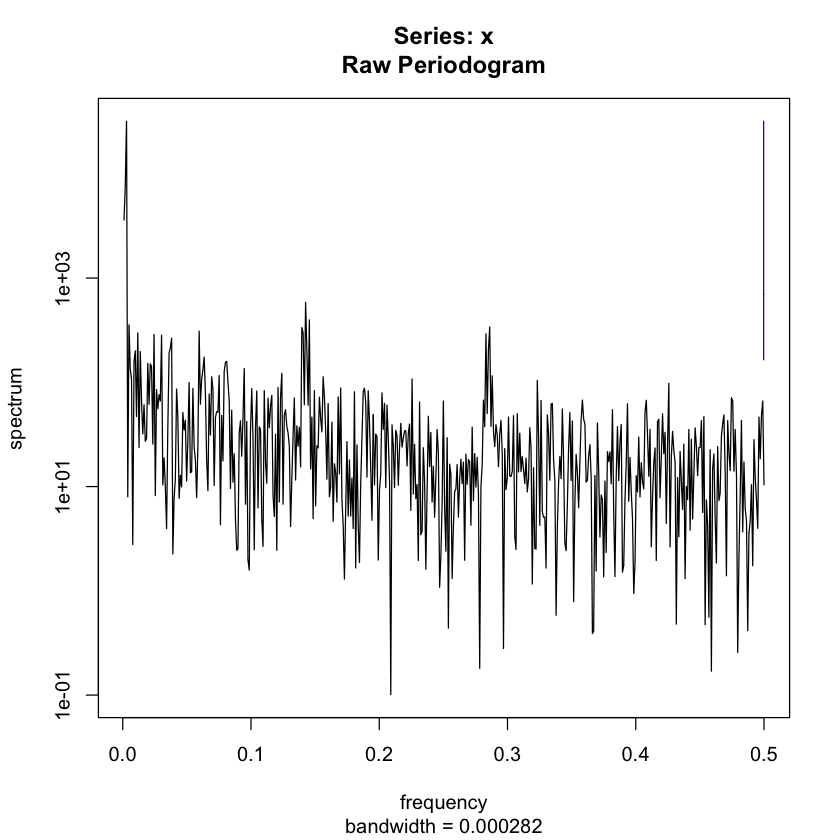

In [19]:
spectrum(df$V2)